# Machine Learning HW1 Question 8

## Amir Khazaie - 96131038

We use `pandas` for loading and working with data, `numpy` for some matrix operations, `matplotlib` for drawing plots and a little of `scikit learn` for dividing data to train and test datasets.

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import pinv
from numpy import matrix as mat
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
%matplotlib inline

Loading data from `data.xlsx` and scaling _X_ and _Y_ column based on mean feature scaling.

,X,Y
count,100.000000,100.000000
mean,0.500000,0.563531
std,0.293045,0.349551
min,0.000000,0.000000
25%,0.250000,0.206108
50%,0.500000,0.654508
75%,0.750000,0.904508
max,1.000000,1.000000


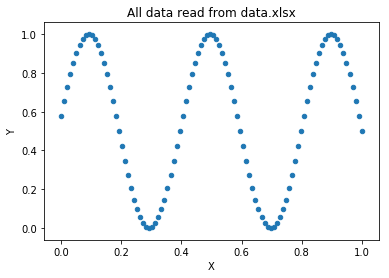

In [2]:
df = pd.read_excel('data.xlsx', names=['X', 'Y'])
df = (df - df.min()) / (df.max() - df.min())  # feature scaling
df.plot.scatter(title='All data read from data.xlsx', x='X', y='Y');
df.describe()

Using _80%_ of data for training and _20%_ of data for testing the model. As you can see the plot below shows _green_ points selected for training and _red_ points for testing.

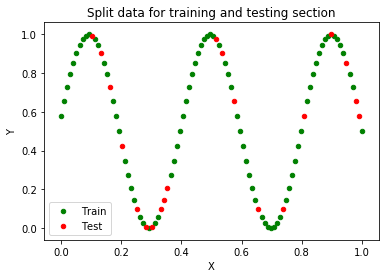

In [3]:
train, test = train_test_split(df, test_size=0.2)
xtrain, ytrain = train['X'], train['Y']
xtest, ytest = test['X'], test['Y']

# Ploting selected data
p = train.plot.scatter(x='X', y='Y', color='green', label='Train');
test.plot.scatter(title='Split data for training and testing section', x='X', y='Y', color='red', label='Test', ax=p);

Defining a function that recieve $\overline{\theta}$ of a model and plot it.

In [4]:
def plot(theta, x_range, p=None):
    x = np.array(x_range)  
    y = [sum([theta[power]*num**power for power in range(len(theta))]) for num in x]
    return plt.plot(x, y) if p is None else p.plot(x, y)

Calculating _error_ based on $\overline{\theta}$ and feature and target dataset passed to the function.

In [5]:
def error(theta, X, Y):
    return (((theta * X).sum(axis=1) - Y)**2).sum()

Gradient descent function that recieves feature and target datasets, degree of polynomial expression, learning rate (alpha) and number of iterations. The formula used in this function is: $$\theta_{j+1} := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

I tried so much, but after almost *five* days i couldn't make it work. There is two problems with this function, it is slow, and I don't know why it won't converge!

In [6]:
def gradient_descent(X, Y, d, a, it):
    theta, m = np.ones(d+1), len(X)
    for i in range(it):
        theta = [theta[t] - (a/m) * (((theta * X).sum(axis=1) - Y) * X[t]).sum() for t in range(len(theta))]
    return theta

Normal equation (close form) was so simple and short that I embed it in the main code below

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


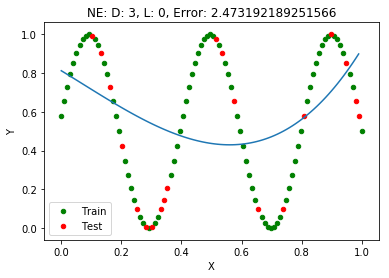

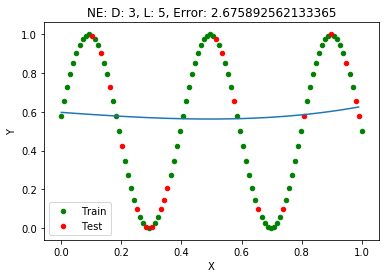

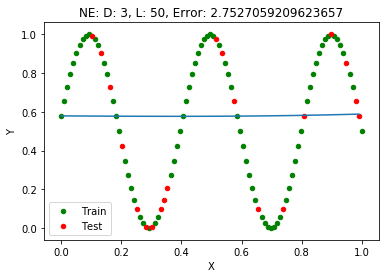

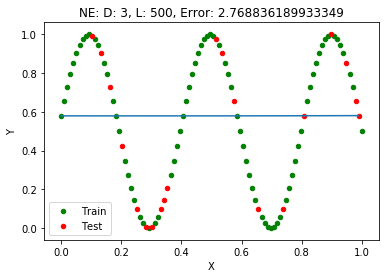

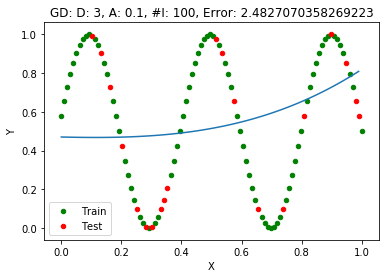

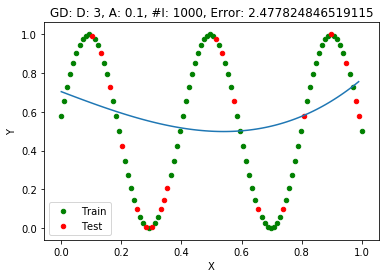

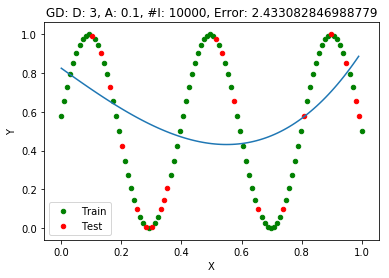

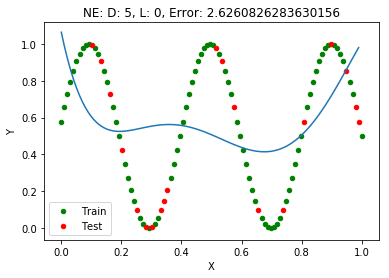

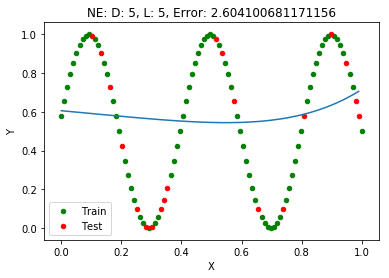

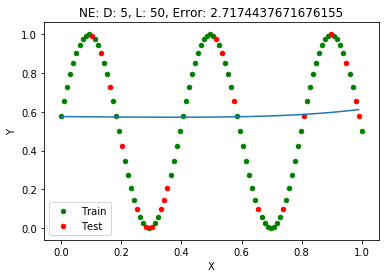

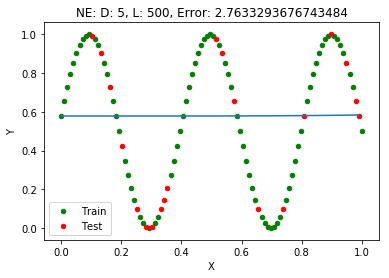

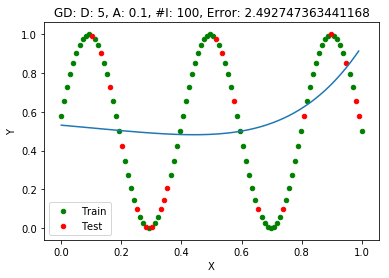

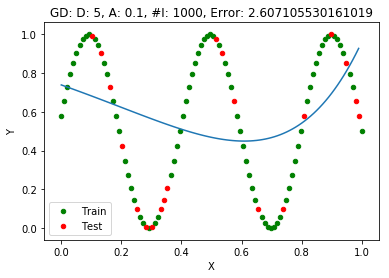

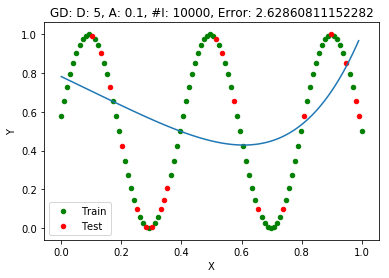

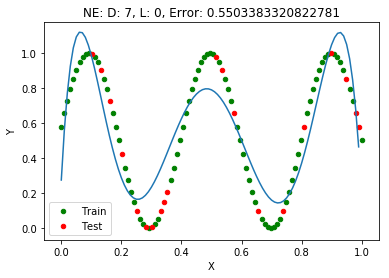

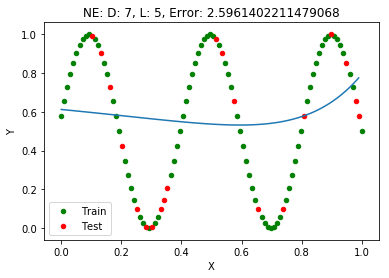

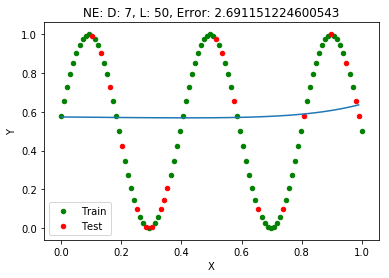

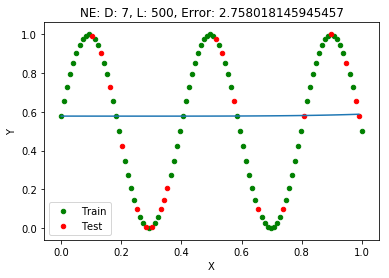

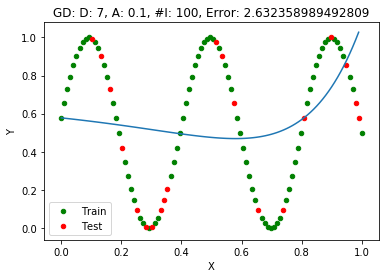

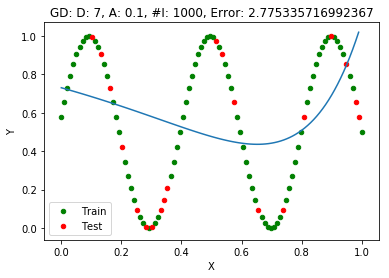

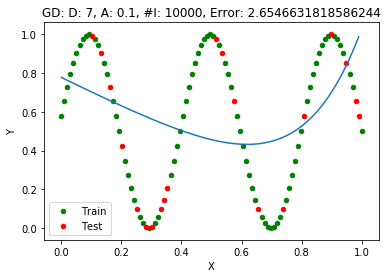

In [8]:
for degree in (3, 5, 7):
    X, Y = pd.concat([xtrain**power for power in range(degree+1)], axis=1), ytrain
    X.columns = range(degree+1)
    
#     Normal Equation
    fix = pd.DataFrame(np.eye(degree+1))
    fix.iloc[0][0] = 0
    for l in [0, 5, 50, 500]:
        theta = np.dot(np.dot(pinv(np.dot(X.transpose(), X) + l*fix), X.transpose()), Y)
        neplt = train.plot.scatter(x='X', y='Y', color='green', label='Train')
        test.plot.scatter(title='NE: D: {}, L: {}, Error: {}'.format(degree, l, error(theta, pd.concat([xtest**power for power in range(degree+1)], axis=1), ytest)),
                          x='X', y='Y', color='red', label='Test', ax=neplt)
        plot(theta, np.arange(0, 1, 0.01), neplt)
    
    # TODO Gradient Descent
    for num_of_iters in [100, 1000, 10000]:
        alpha = 0.1
        theta = gradient_descent(X, Y, degree, alpha, num_of_iters)
        gdplt = train.plot.scatter(x='X', y='Y', color='green', label='Train')
        test.plot.scatter(title='GD: D: {}, A: {}, #I: {}, Error: {}'.format(degree, alpha, num_of_iters, error(theta, pd.concat([xtest**power for power in range(degree+1)], axis=1), ytest)),
                          x='X', y='Y', color='red', label='Test', ax=gdplt)
        plot(theta, np.arange(0, 1, 0.01), gdplt)